In [103]:
import matplotlib.pyplot as plt

In [104]:
class vertex:
  def __init__(self,x,y,n):
    self.x = x
    self.y = y
    self.name = n
    self.e_inc = None
    self.tipo = None 

  def edge_inicident(self,e):
    self.e_inc = e
  
  #Relacion de orden en binario 0 indica que esta abajo y el 1 indica que esta arriba
  def r_order_binary(self,q):
        if self.y > q.y:
            print('coory:',self.y,q.y)
            return 0
        elif self.y == q.y:
            if self.x < q.x:
                return 0
            else:
                return 1
        else:
            return 1

In [105]:
class half_edge:
  def __init__(self, start, end, name):
    self.origin = start
    self.queue = end
    self.name = name
    self.next = None
    self.prev = None

  def add_next(self,nex):
    self.next = nex

  def add_prev(self, p):
    self.prev = p

In [106]:
#Producto cruz
def Producto_Cruz(P0,P1,P2):
    d = ((P1.x-P0.x)*(P2.y-P0.y))-((P2.x-P0.x)*(P1.y-P0.y))
    return d

In [107]:
#Orientacion
def orientacion(P0,P1,P2):
    d = Producto_Cruz(P0,P1,P2)
    if d>0:
        a = True
        print("P2 se hace un giro en sentido horario de P1")
    else:
        a = False
        print("P2 esta girando en sentido Anti horario de P1")
    return a 

In [108]:
#Generamos una lista de vertices
def general_vertex(P):
    list_vertex = []
    for i in range(len(P)):
        name = "V"+str(i+1)
        v = vertex(P[i][0],P[i][1], name)
        list_vertex.append(v)
    return list_vertex

In [109]:
def general_edge(P):
    list_half_edge = []
    for i in range(len(P)):
        name_edge = 'e'+str(i+1)
        if i == (len(P)-1):
            e = half_edge(P[i], P[0], name_edge)
        else: 
            e = half_edge(P[i], P[i+1], name_edge)

        list_half_edge.append(e)  
    return list_half_edge

In [110]:
def prev(lst):
    for i in range(len(lst)):
        if i == 0:
            lst[i].add_prev(lst[len(lst)-1])
        else:
            lst[i].add_prev(lst[i-1])
    return lst

In [111]:
def next_(lst):
    for i in range(len(lst)):
        if i == len(lst)-1:
            lst[i].add_next(lst[0])
        else:
            lst[i].add_next(lst[i+1])
    return lst

In [112]:
def New_list_vertex(le,ls):
    for i in range(len(le)):
      for j in range(len(ls)):
        if ls[j].name == le[i].origin.name:
            ls[i].edge_inicident(le[i])
      
    return ls

In [113]:
def neighbors(v):
    e = v.e_inc # Tomamos la arista incidente
    e_prev = e.prev #Tomamos la semi-arista previa
    e_next = e.next #Tomamos la semi-arista next
    v1 = e_prev.origin #Tomamos el vertice que da origen a la semi-arista prev
    v2 = e_next.origin # Tomamos el vetice final de la semi arista next
    pos1 = v.r_order_binary(v1) #Vemos la posicion de v1 con respecto a v
    pos2 = v.r_order_binary(v2) #Vemos la posicion de V2 con respecto a v
    print(pos1,pos2)
    #print('v1:',v1.x,v1.y)
    #print('v2:',v2.x,v2.y)
    if pos1 != pos2:
        print('uno arriba y otro abajo')
        return 1 #Esta uno arriba y otro abajo
    else:
        if pos1 == 1 and pos2 == 1:
            print('Ambos estan arriba')
            return 2 #Ambos estan abajo
        elif pos1 == 0 and pos2 == 0:
            print('Ambos estan abajo')
            return 3 #Ambos estan abajo

In [114]:
def type_vertex(v): 
    pos = neighbors(v)
    print(pos)
    print(orientacion(v.e_inc.origin,v.e_inc.prev.origin,v.e_inc.next.origin))
    if pos == 3: #Estan por debajo
        if orientacion(v.e_inc.origin,v.e_inc.prev.origin,v.e_inc.next.origin): #TRUE - antihorario
            v.tipo = 'start'
        else: #False - horario
            v.tipo = 'split'
    elif pos == 2: #Estan por arriba
        if orientacion(v.e_inc.origin,v.e_inc.prev.origin,v.e_inc.next.origin): #TRUE - antihorario
            v.tipo = 'end'
        else: #False - horario
            v.tipo = 'merge'
    else:
        v.tipo = 'regular'
    return v

## Prueba

In [115]:
P = [[9, 0.5], [7, -3], [6, 3], [2, -3], [3, 4], [4, 2.5], [5, 12], [7, 8.5], [8, 12], [9.5, 11], [11, 15], [13, 13], [12, 10], [13, 3], [11, 4], [10, -1], [9, 0.5]]
P2 = [[9, 0.5], [7, -3], [6, 3], [2, -3], [3, 4], [4, 2.5], [5, 12], [7, 8.5], [8, 12], [9.5, 11], [11, 15], [13, 13], [12, 10], [13, 3], [11, 4], [10, -1]]
lv =general_vertex(P2) 
le = general_edge(lv)
le = prev(le)
le = next_(le)
lv = New_list_vertex(le,lv)

for i in le:
  print([i.origin.x,i.origin.y],[i.prev.origin.x,i.prev.origin.y],[i.next.origin.x,i.next.origin.y])






[9, 0.5] [10, -1] [7, -3]
[7, -3] [9, 0.5] [6, 3]
[6, 3] [7, -3] [2, -3]
[2, -3] [6, 3] [3, 4]
[3, 4] [2, -3] [4, 2.5]
[4, 2.5] [3, 4] [5, 12]
[5, 12] [4, 2.5] [7, 8.5]
[7, 8.5] [5, 12] [8, 12]
[8, 12] [7, 8.5] [9.5, 11]
[9.5, 11] [8, 12] [11, 15]
[11, 15] [9.5, 11] [13, 13]
[13, 13] [11, 15] [12, 10]
[12, 10] [13, 13] [13, 3]
[13, 3] [12, 10] [11, 4]
[11, 4] [13, 3] [10, -1]
[10, -1] [11, 4] [9, 0.5]


In [116]:
v_split = []
for i in range(len(lv)):
    v = lv[i]
    lv[i] = type_vertex(v)
    print([lv[i].e_inc.prev.origin.x,lv[i].e_inc.prev.origin.y],[lv[i].x,lv[i].y],[lv[i].e_inc.next.origin.x,lv[i].e_inc.next.origin.y],  lv[i].tipo)
    print('----------------------------')

coory: 0.5 -1
coory: 0.5 -3
0 0
Ambos estan abajo
3
P2 esta girando en sentido Anti horario de P1
False
P2 esta girando en sentido Anti horario de P1
[10, -1] [9, 0.5] [7, -3] split
----------------------------
1 1
Ambos estan arriba
2
P2 se hace un giro en sentido horario de P1
True
P2 se hace un giro en sentido horario de P1
[9, 0.5] [7, -3] [6, 3] end
----------------------------
coory: 3 -3
coory: 3 -3
0 0
Ambos estan abajo
3
P2 esta girando en sentido Anti horario de P1
False
P2 esta girando en sentido Anti horario de P1
[7, -3] [6, 3] [2, -3] split
----------------------------
1 1
Ambos estan arriba
2
P2 se hace un giro en sentido horario de P1
True
P2 se hace un giro en sentido horario de P1
[6, 3] [2, -3] [3, 4] end
----------------------------
coory: 4 -3
coory: 4 2.5
0 0
Ambos estan abajo
3
P2 se hace un giro en sentido horario de P1
True
P2 se hace un giro en sentido horario de P1
[2, -3] [3, 4] [4, 2.5] start
----------------------------
1 1
Ambos estan arriba
2
P2 esta gir

# Lista de vertices de tipo split

In [120]:
v_split = []
for i in lv:
  #print(i.x,i.y,i.tipo)
  if i.tipo == 'split':
    v_split.append([i.x,i.y])
print(v_split)

[[9, 0.5], [6, 3], [11, 4]]


In [126]:
def grafic(P,x,y,ls):
    xcor = []
    ycor = []
    for n in range (len(P)):
        xcor.append(P[n][0])
        ycor.append(P[n][1])
    
    plt.scatter(x,y)
    for n in range(len(ls)):
      plt.plot(ls[n][0],ls[n][1], "ro")
    for n in range(len(P)):
        num = "P"+str(n)
        #print(num)
        plt.annotate(num , xy = (P[n][0], P[n][1]), xytext=(P[n][0], P[n][1]))
    plt.plot(xcor,ycor)
    plt.show()

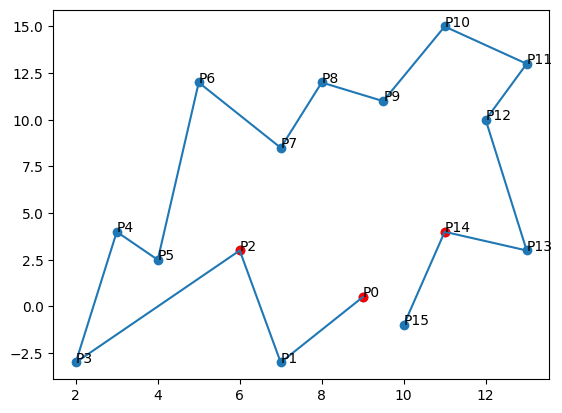

In [127]:
x = []
y = []
for n in range (len(P2)):
        x.append(P2[n][0])
        y.append(P2[n][1])

grafic(P2,x,y,v_split)